In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({"text.usetex": True})
plt.rcParams.update({"font.size": '14'})

In [9]:
df = pd.read_csv("single_batch_sweep_result.csv")

x = df['JSON File size (GiB)']

y = df[['Load JSON (GB/s)', 'Parse JSON (GB/s)', 
     'Convert to Arrow (in) (GB/s)', 'Convert to Arrow (out) (GB/s)',
     'Write Arrow IPC message (GB/s)', 'Publish IPC message in Pulsar (GB/s)']]

y

,Load JSON (GB/s),Parse JSON (GB/s),Convert to Arrow (in) (GB/s),Convert to Arrow (out) (GB/s),Write Arrow IPC message (GB/s),Publish IPC message in Pulsar (GB/s)
0,0.015533,0.087569,0.002833,0.002980,0.014609,0.000523
1,0.031737,0.151087,0.006278,0.001405,0.014182,0.000533
2,0.090945,0.373467,0.017282,0.003178,0.020329,0.000775
3,0.127897,0.227605,0.034060,0.006588,0.025789,0.000877
4,0.254822,0.456620,0.050656,0.010731,0.035336,0.000544
5,0.421408,0.438694,0.080925,0.017666,0.055920,0.001737
6,0.976294,0.833992,0.358233,0.003416,0.017809,0.000543
7,1.076010,0.586255,0.241212,0.052822,0.149066,0.004916
8,0.957323,0.580216,0.199725,0.042626,0.192225,0.008039
9,1.227030,0.522552,0.387749,0.085349,0.377122,0.016014


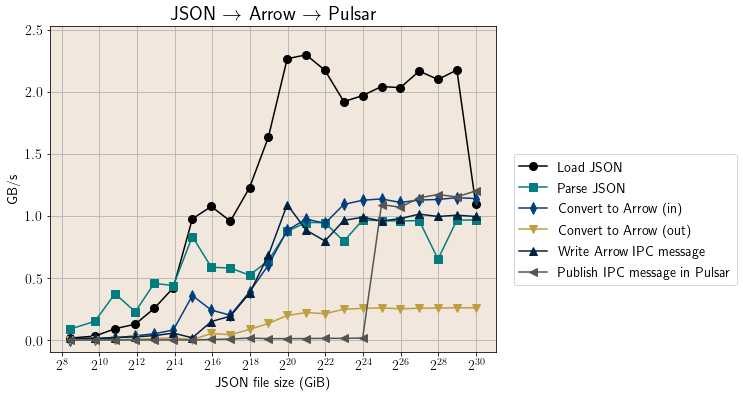

In [10]:
# Some Teratide colors
def rgb(uint):
    return [x / 255 for x in uint]
    
tt_bg = rgb([241,231,220])
tt_colors = [rgb(x) for x in [[0,0,0], [1,125,127], [1,63,127], [189,158,64], [1,32,64], [84,84,85]]]
markers = ['o', 's','d','v','^','<','>']

# Create figs and plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('JSON $\\rightarrow$ Arrow $\\rightarrow$ Pulsar', fontweight="bold", fontsize=20)

i=0

for (name, data) in y.iteritems():
    ax.plot(x, data, color=tt_colors[i], marker=markers[i], markersize=8)
    i = i + 1

ax.set_xlabel('JSON file size (GiB)')
ax.set_xscale('log', base = 2)
ax.set_xticks([2**n for n in range(8,32,2)])
    
ax.set_ylabel('GB/s')
ax.set_ylim([-0.1, 1.1 * y.max().max()])

ax.grid()

fig.legend([name.replace(' (GB/s)','') for name in y.columns], bbox_to_anchor=(1.33, 0.6), ncol=1)

ax.set_facecolor(tt_bg)
fig.set_facecolor('white')